In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# figures inline, ignore warnings, setting visualisation style, standardisation
%matplotlib inline 
import warnings 
warnings.filterwarnings("ignore") 
sns.set()
from sklearn.preprocessing import StandardScaler

# algo libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# evaluation libraries
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, classification_report, roc_auc_score

In [2]:
# load datasets
train_data=pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
# display basic informations
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


### Data visualisation

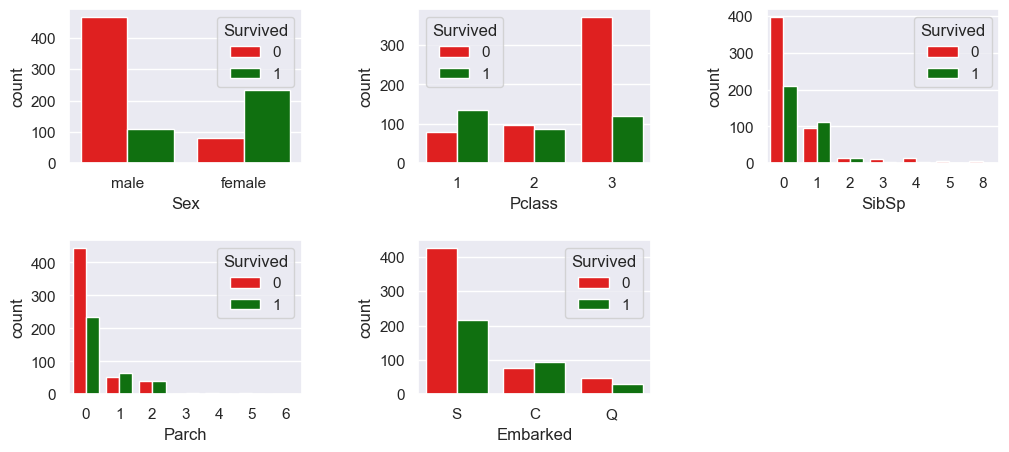

In [7]:
fig, axs = plt.subplots(2,3, figsize=(12,5))
sns.countplot(data=train_data, x='Sex', hue="Survived", ax=axs[0][0], palette=['#ff0000',"#008000"])
sns.countplot(data=train_data, x='Pclass', hue="Survived", ax=axs[0][1], palette=['#ff0000',"#008000"])
sns.countplot(data=train_data, x='SibSp', hue="Survived", ax=axs[0][2], palette=['#ff0000',"#008000"])
sns.countplot(data=train_data, x='Parch', hue="Survived", ax=axs[1][0], palette=['#ff0000',"#008000"])
sns.countplot(data=train_data, x='Embarked', hue="Survived", ax=axs[1][1], palette=['#ff0000',"#008000"])
fig.delaxes(axs[1,2])
plt.subplots_adjust(hspace=0.5, wspace=0.5)

### Data analysis of categorical columns :
* Female are more survivors than men
* Pclass 1 has highest % of survivors, then Pcalss 2 and then Pclass 3
* People having Sibsp & Parch of 1 and 2 have more % of survivors
* People Embarked from C have more % of survivors then other Emabarked ones

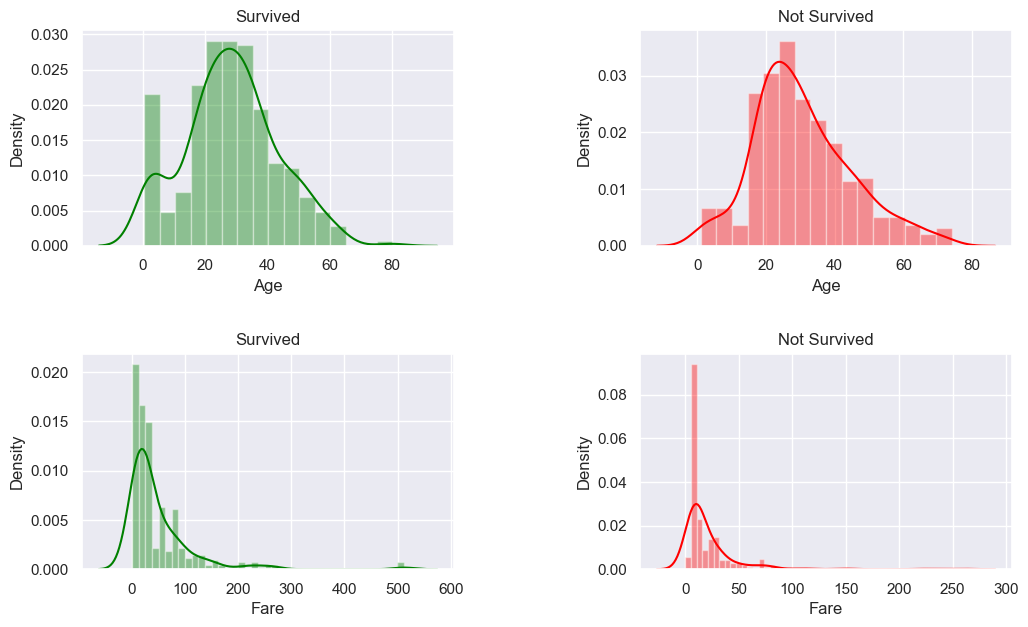

In [8]:
fig, axs = plt.subplots(2,2, figsize=(12,7))
sns.distplot(train_data[train_data['Survived']==1]['Age'], color ='green', ax=axs[0,0]).set(title='Survived')
sns.distplot(train_data[train_data['Survived']==0]['Age'], color ='red', ax=axs[0,1]).set(title='Not Survived')
sns.distplot(train_data[train_data['Survived']==1]['Fare'], color ='green', ax=axs[1,0]).set(title='Survived')
sns.distplot(train_data[train_data['Survived']==0]['Fare'], color ='red', ax=axs[1,1]).set(title='Not Survived')
plt.subplots_adjust(hspace=0.5, wspace=0.5)

### Data analysis of numerical columns :
* Age & Fares are normally distributed among passengers (excluding few outliers majorly in fares)
* Mean Age of survivors is less than of non survivors because of high surviving % of children and youth

In [9]:
# storing survived column from train data as a target variable
y_train = train_data['Survived']

In [10]:
# concatenating both data sets for cleaning and preprocessing without Survived column from training data
combined_data = pd.concat([train_data.drop(['Survived'], axis=1), test_data])

### Data Pre processing

In [11]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [12]:
# checking null values
combined_data.isna().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [13]:
# having many null values, let's drop Cabin, Passenger Id (being serial nos. only) and Ticket(being random alphanumeric)
combined_data.drop(['Cabin', 'PassengerId', 'Ticket'], axis=1, inplace=True)

In [14]:
combined_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [15]:
# extracting out Name titles considering it an important feature and dropping Name column
combined_data["Title"] = combined_data["Name"].str.extract(r' ([A-Za-z]+)\.', expand=False)
combined_data['Title'] = combined_data['Title'].replace({'Mme':'Mrs', 'Ms':'Miss','Mlle':'Miss'})
combined_data['Title'] = combined_data['Title'].replace(['Sir', 'Don', 'Dona', 'Dr', 'Major', 'Rev', 'Lady', 
                                                         'Col', 'Capt', 'Countess', 'Jonkheer'],'Rare')
combined_data.drop('Name', axis=1, inplace=True)

In [16]:
combined_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,male,22.0,1,0,7.2500,S,Mr
1,1,female,38.0,1,0,71.2833,C,Mrs
2,3,female,26.0,0,0,7.9250,S,Miss
3,1,female,35.0,1,0,53.1000,S,Mrs
4,3,male,35.0,0,0,8.0500,S,Mr


<Axes: xlabel='Title', ylabel='count'>

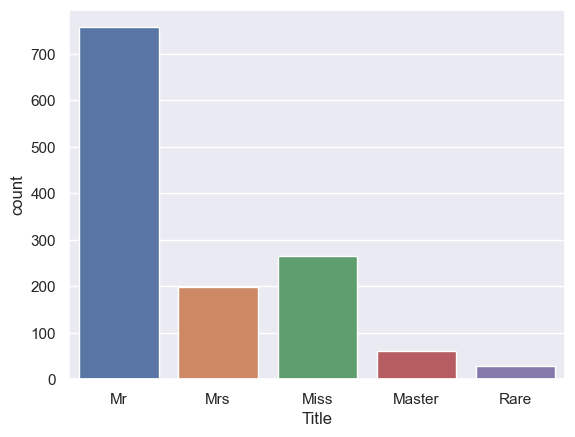

In [17]:
# checking presence and weight of each title
sns.countplot(data = combined_data, x = 'Title')

<Axes: xlabel='Title', ylabel='count'>

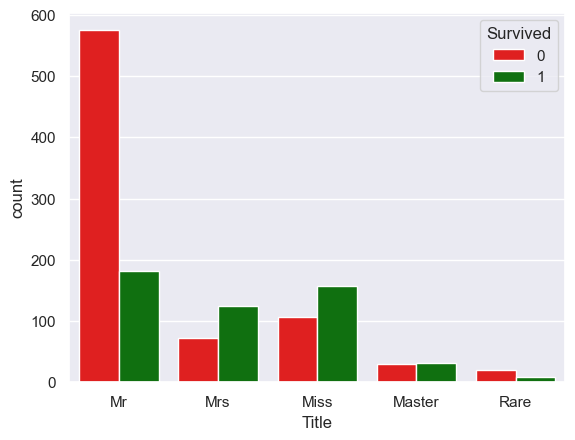

In [18]:
# Data visualisation as per titles
title_data = pd.concat([combined_data, y_train], axis=1)
sns.countplot(data=title_data, x='Title', hue='Survived', palette=['#ff0000',"#008000"])

#### Analysis : Miss, Mrs. and Master have higher chances of survival than Mr. and Rare

In [19]:
# filling null values of Fare and Embarked

# Being continuous, filling Fare na with mean
combined_data['Fare'].fillna(combined_data['Fare'].mean(), inplace=True)

# Being categorical variable, filling Embarked na with mode
combined_data['Embarked'].fillna(combined_data['Embarked'].mode()[0], inplace=True)

In [20]:
# Transforming categorical coulmns into binary variables
combined_data['Pclass'] = combined_data['Pclass'].astype(object)
data_enc = pd.get_dummies(combined_data, drop_first=True)

In [21]:
data_enc.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,22.0,1,0,7.2500,False,True,True,False,True,False,True,False,False
1,38.0,1,0,71.2833,False,False,False,False,False,False,False,True,False
2,26.0,0,0,7.9250,False,True,False,False,True,True,False,False,False
3,35.0,1,0,53.1000,False,False,False,False,True,False,False,True,False
4,35.0,0,0,8.0500,False,True,True,False,True,False,True,False,False


In [22]:
# Filling null values of Age as per median ages of Title

# Finding median age per title
title_median = data_enc.groupby(['Title_Mr', 'Title_Mrs', 'Title_Miss', 'Title_Rare'])["Age"].median()

for index, row in data_enc.iterrows():
    if pd.isnull(row['Age']):
        title = (row['Title_Mr'], row['Title_Mrs'], row['Title_Miss'], row['Title_Rare'])
        age_median = title_median.loc[title]
        data_enc.at[index, 'Age'] = age_median

In [23]:
data_enc.isna().sum()

Age           0
SibSp         0
Parch         0
Fare          0
Pclass_2      0
Pclass_3      0
Sex_male      0
Embarked_Q    0
Embarked_S    0
Title_Miss    0
Title_Mr      0
Title_Mrs     0
Title_Rare    0
dtype: int64

In [24]:
# splitting back into train and test data
train_proc = pd.concat([data_enc.iloc[:891], y_train], axis=1)
test_proc = data_enc.iloc[891:]

### Removing of outliers

<Axes: xlabel='Fare'>

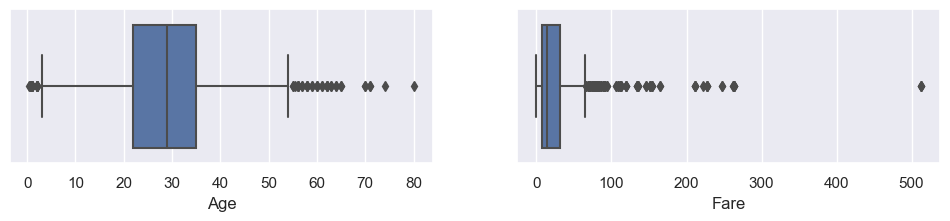

In [25]:
# checking for outliers in train[Age] and train[Fare]
fig, axs = plt.subplots(1,2, figsize=(12,2))
sns.boxplot(data = train_proc, x = 'Age', ax=axs[0])
sns.boxplot(data = train_proc, x = 'Fare', ax=axs[1])

In [26]:
# As there are many values more than upper limit of Boxplot, we can manually increase the upper limit so to drop limited data
# like considering outliers as Age>68 and Fare>100
train_proc.drop(train_data[train_data['Age']>68].index, inplace=True)
train_proc.drop(train_data[train_data['Fare']>100].index, inplace=True)

<Axes: xlabel='Fare'>

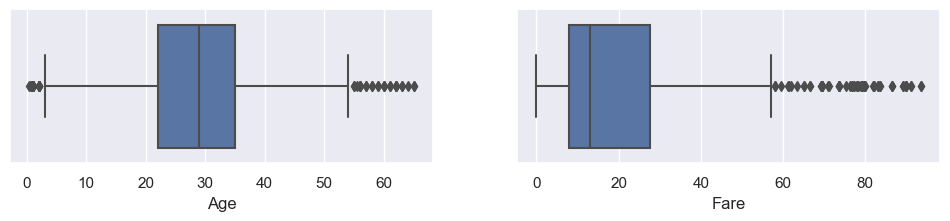

In [27]:
fig, axs = plt.subplots(1,2, figsize=(12,2))
sns.boxplot(data = train_proc, x = 'Age', ax=axs[0])
sns.boxplot(data = train_proc, x = 'Fare', ax=axs[1])

In [28]:
# 831 rows are remianing after removing of outliers
train_proc.shape

(831, 14)

<Axes: >

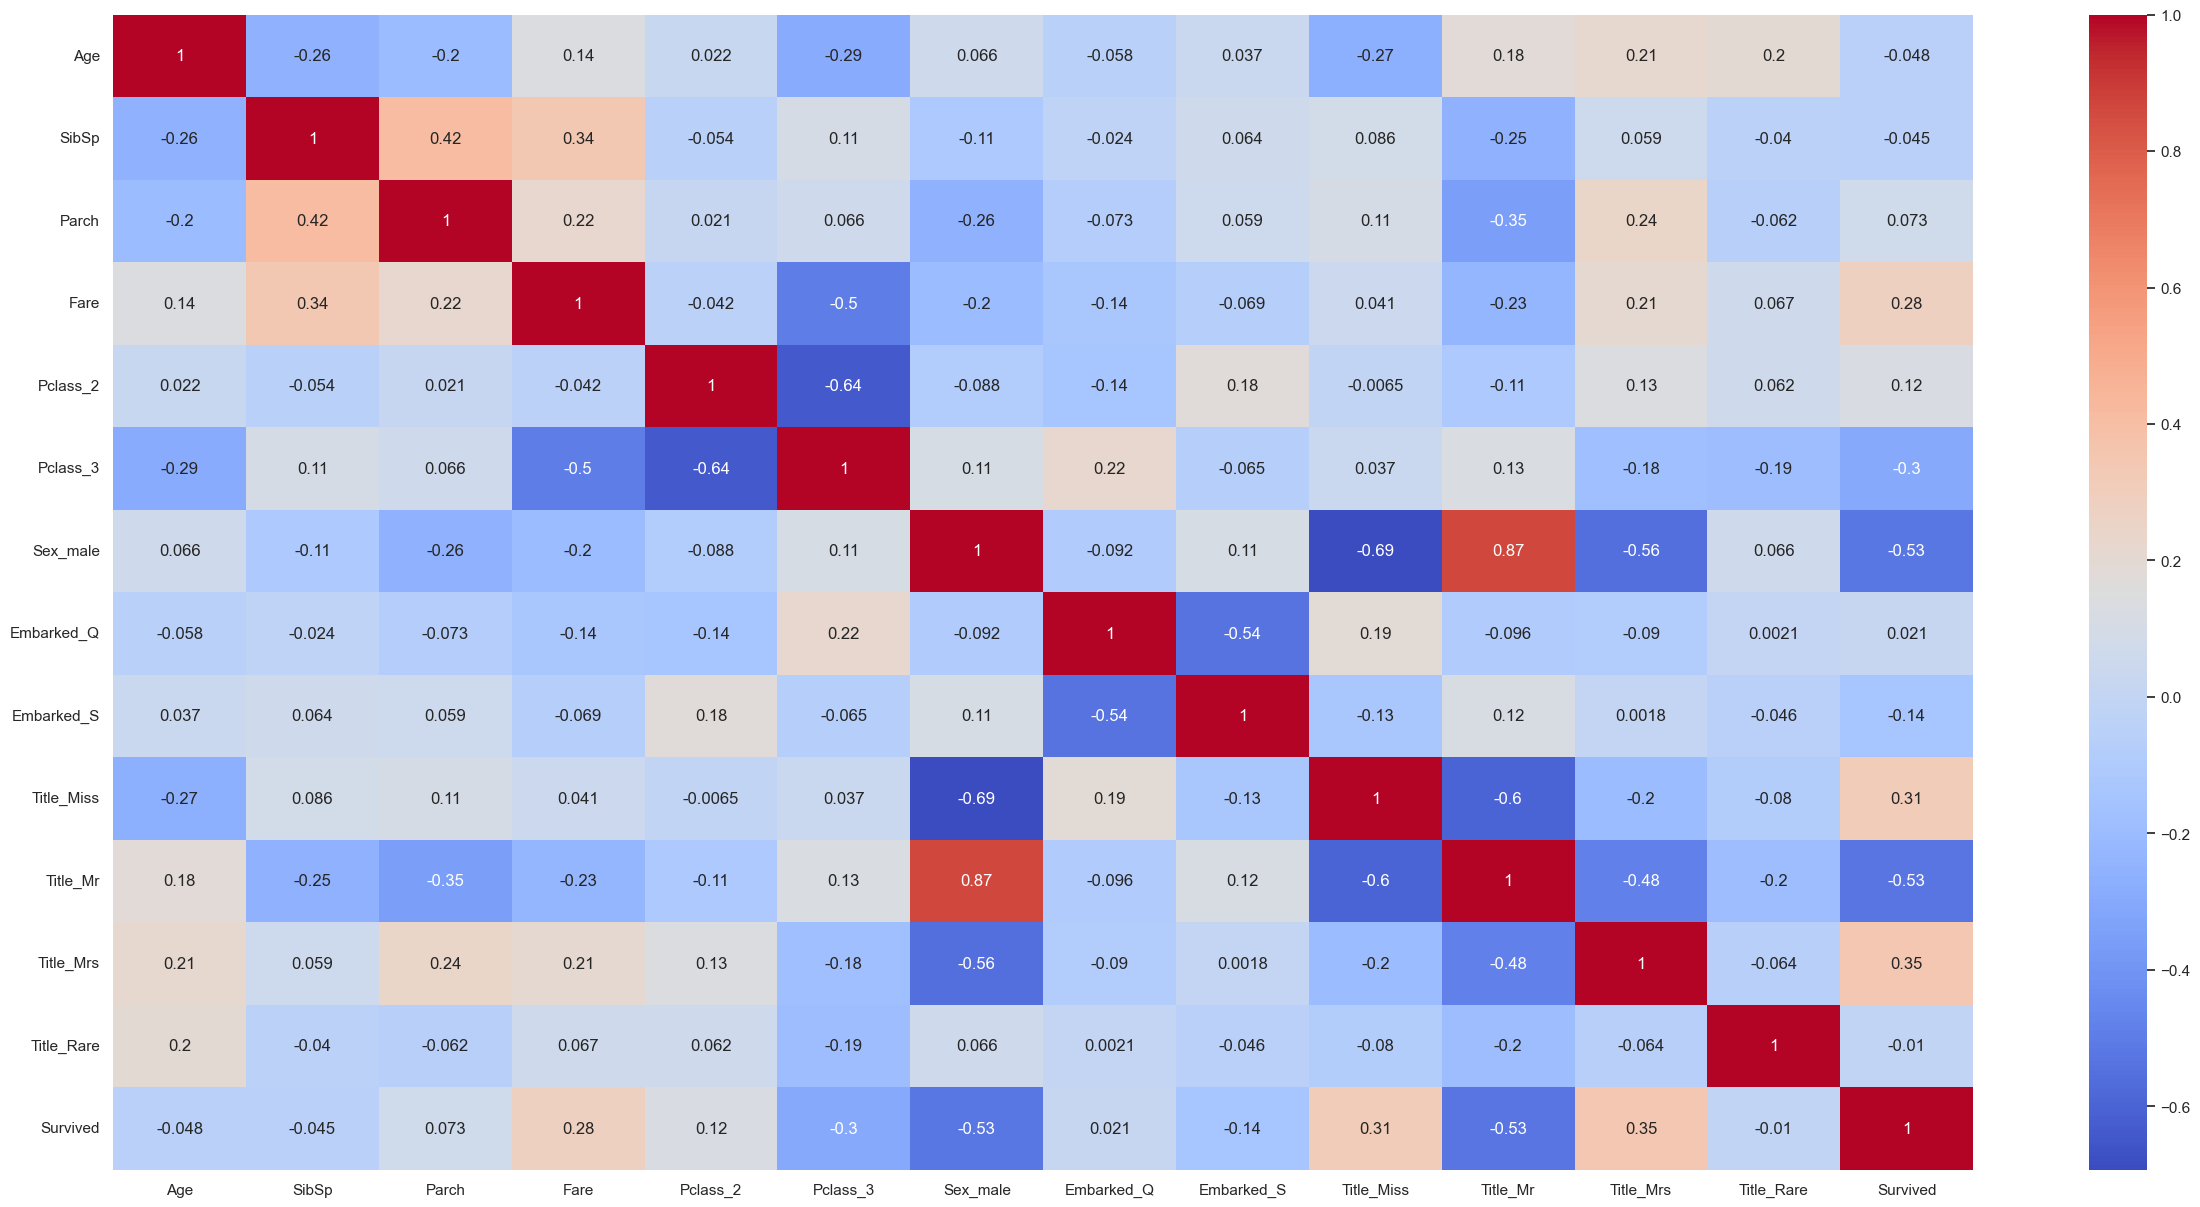

In [29]:
# seeing correaltion among features
plt.figure(figsize=(30,15))
sns.heatmap(train_proc.corr(),annot=True,cmap="coolwarm")

In [30]:
# standardisation of Age and Fare variables
scaler = StandardScaler()
train_proc["Age"]=scaler.fit_transform(train_proc[["Age"]])
train_proc["Fare"]=scaler.fit_transform(train_proc[["Fare"]])
test_proc["Age"]=scaler.fit_transform(test_proc[["Age"]])
test_proc["Fare"]=scaler.fit_transform(test_proc[["Fare"]])

In [49]:
# Save the train and test data to a CSV file for machine lerning algorithms
train_proc.to_csv('train_proc', index=False)
test_proc.to_csv('test_proc', index=False)